# Best Practices for NLP

Creating word vectors after preprocessing our natural language data.

#### Load Dependencies

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline

Using TensorFlow backend.


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
from gensim.models.phrases import Phraser, Phrases
from keras.preprocessing.text import one_hot

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Load Data

In [5]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [6]:
from nltk.corpus import gutenberg

In [7]:
# Due to lack of resources, I'm not working with the full Gutenberg dataset (18 books).
gberg_sents = gutenberg.sents(fileids=['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'carroll-alice.txt'])

#### Preprocess a Sentence

In [8]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

#### Convert to Lowercase

In [9]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

#### Remove Stopwords and Punctuations

In [10]:
stopwords = stopwords.words('english') + list(string.punctuation)

In [11]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [12]:
[w.lower() for w in gberg_sents[4] if w not in stopwords]

['she',
 'youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

#### Stem Words

In [13]:
stemmer = PorterStemmer()

In [14]:
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w not in stopwords]

['she',
 'youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

#### Handle Bigrams Colocations

In [15]:
phrases = Phrases(gberg_sents)

In [16]:
bigram = Phraser(phrases)

In [17]:
bigram.phrasegrams

{(b'!--', b'Such'): (10, 17.59410195613515),
 (b'"', b'Ah'): (48, 20.401114929667518),
 (b'"', b'Ay'): (10, 10.912224264705882),
 (b'"', b'Aye'): (18, 20.265559348739494),
 (b'"', b'Certainly'): (21, 18.706670168067227),
 (b'"', b'Dear'): (21, 13.783862229102166),
 (b'"', b'Did'): (20, 10.447874295994993),
 (b'"', b'Good'): (17, 10.912224264705882),
 (b'"', b'Indeed'): (32, 17.677803308823528),
 (b'"', b'Me'): (11, 17.85636697860963),
 (b'"', b'My'): (74, 11.127243462039987),
 (b'"', b'Nay'): (13, 13.783862229102166),
 (b'"', b'No'): (128, 14.749489940206852),
 (b'"', b'Not'): (30, 10.628789868220016),
 (b'"', b'Oh'): (188, 17.620032709775085),
 (b'"', b'Perhaps'): (24, 11.961476597850679),
 (b'"', b'Thank'): (18, 14.675060218052739),
 (b'"', b'Upon'): (25, 14.880305815508022),
 (b'"', b'Very'): (37, 14.96533613445378),
 (b'"', b'Well'): (93, 16.004595588235293),
 (b'"', b'Yes'): (131, 23.043691464015776),
 (b'&', b'c'): (13, 6744.14201183432),
 (b"'", b'clock'): (26, 23.27271171542584

In [18]:
'Jon lives in New York City'.split()

['Jon', 'lives', 'in', 'New', 'York', 'City']

In [19]:
bigram['Jon lives in New York City'.split()]

['Jon', 'lives', 'in', 'New', 'York', 'City']

#### Preprocess the Corpus

In [20]:
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w not in list(string.punctuation)])

In [21]:
lower_sents[0:5]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period']]

In [22]:
lower_bigram = Phraser(Phrases(lower_sents))

In [23]:
lower_bigram.phrasegrams

{(b',"', b'answered'): (10, 10.380151763130488),
 (b',"', b'continued'): (27, 25.15867291741796),
 (b',"', b'cried'): (101, 55.12523149100787),
 (b',"', b'replied'): (104, 55.43259468526529),
 (b',"', b'said'): (511, 45.0399988772245),
 (b",'", b'alice'): (25, 15.546691328037083),
 (b",'", b'said'): (237, 47.34562303646543),
 (b",'", b'thought'): (22, 10.394161415563133),
 (b'--', b'oop'): (7, 18.2451781627983),
 (b'a', b'few'): (184, 13.099085954283028),
 (b'a', b'mile'): (20, 12.773105653744752),
 (b'a', b'minute'): (36, 10.188605913279439),
 (b'a', b'vast'): (13, 11.528546641328596),
 (b'abbey', b'mill'): (11, 2455.073313782991),
 (b'acquainted', b'with'): (67, 33.05665308867473),
 (b'admiral', b'croft'): (14, 313.78560719640177),
 (b'affected', b'by'): (10, 15.520578420467187),
 (b'after', b'breakfast'): (7, 12.328694499668654),
 (b'after', b'dinner'): (14, 26.559155704073433),
 (b'agree', b'with'): (17, 18.341110745974365),
 (b'all', b'probability'): (13, 18.01433090181396),
 (b'a

In [24]:
lower_bigram['jon lives in new york city'.split()]

['jon', 'lives', 'in', 'new', 'york', 'city']

In [25]:
lower_bigram = Phraser(Phrases(lower_sents, min_count=20, threshold=50))

In [26]:
lower_bigram.phrasegrams

{(b'am', b'sure'): (217, 73.91333926703541),
 (b'an', b'hour'): (84, 51.91270680975247),
 (b'camden', b'place'): (29, 157.46332288401254),
 (b'captain', b'benwick'): (56, 234.50420168067225),
 (b'captain', b'harville'): (37, 103.35555555555555),
 (b'captain', b'wentworth'): (196, 368.13095880554056),
 (b'charles', b'hayter'): (33, 287.5538998097654),
 (b'colonel', b'brandon'): (132, 457.9043600562588),
 (b'colonel', b'campbell'): (28, 92.35045917101016),
 (b'dare', b'say'): (99, 158.87218586953387),
 (b'depend', b'upon'): (36, 133.80161821995804),
 (b'don', b't'): (106, 373.60919110779),
 (b'drawing', b'room'): (44, 131.38933573978892),
 (b'each', b'other'): (76, 85.153443766347),
 (b'every', b'body'): (148, 75.63562444416212),
 (b'few', b'minutes'): (52, 127.30839416058394),
 (b'frank', b'churchill'): (151, 381.30903704939925),
 (b'great', b'deal'): (125, 138.31284694686755),
 (b'jane', b'fairfax'): (111, 173.8798734645249),
 (b'john', b'knightley'): (58, 53.24289042416452),
 (b'kelly

In [27]:
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [28]:
clean_sents[0:10]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

#### Run word2vec

In [29]:
# size == dimensions
# window 10: 20 context words, 10 to the left and 10 to the right
model = Word2Vec(sentences=clean_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=2)
model.save('clean_gutenberg_model.w2v')

In [30]:
# We don't have to save the model if we don't want to. It's being done here as demonstration.
model = Word2Vec.load('clean_gutenberg_model.w2v')

In [31]:
len(model.wv.vocab)

4221

#### Explore the Model

In [32]:
model['miss_taylor']

array([-0.09080736,  0.02856234,  0.51081514,  0.06492262, -0.22809598,
       -0.33141711,  0.23554915, -0.13324571,  0.19318725, -0.16704278,
        0.00811593, -0.32154822,  0.29492602,  0.16816764,  0.38067859,
       -0.33021215,  0.00345332,  0.19386949, -0.37634555, -0.14471254,
        0.37499738,  0.11366997,  0.03231217,  0.30997175,  0.06107693,
       -0.06548198,  0.40430057,  0.09228938,  0.0639101 ,  0.14004181,
       -0.21032223,  0.07830676, -0.16689248,  0.23820956,  0.53147072,
        0.01321082,  0.06596692, -0.19996653, -0.06407616,  0.31625187,
        0.22725691, -0.30899519,  0.12827563,  0.13999641, -0.02202229,
        0.31209433, -0.17503832, -0.48581573, -0.42442751, -0.42378947,
       -0.06990362, -0.082723  , -0.04191549,  0.0836084 ,  0.14857271,
       -0.42249352, -0.01272181, -0.11123647,  0.26295751,  0.1796407 ,
        0.18735804, -0.1131133 , -0.36010793, -0.10369141], dtype=float32)

In [33]:
model.most_similar(positive=['miss_taylor', 'man'], negative=['woman'])

[('colonel_campbell', 0.8265792727470398),
 ('depend_upon', 0.7960208058357239),
 ('lucky', 0.7775932550430298),
 ('knows', 0.7775859832763672),
 ('nay', 0.7770599126815796),
 ('relate', 0.7768957614898682),
 ('hurt', 0.7741231918334961),
 ('wrong', 0.7727324962615967),
 ('heaven', 0.7716929316520691),
 ('frederick', 0.7714568376541138)]

In [34]:
model.most_similar(positive=['father', 'woman'], negative=['man'])

[('mother', 0.801315188407898),
 ('husband', 0.7849768400192261),
 ('isabella', 0.7331461906433105),
 ('sister', 0.7182691097259521),
 ('aunt', 0.7182140350341797),
 ('friend', 0.7019449472427368),
 ('sake', 0.6935812830924988),
 ('brother', 0.6919012069702148),
 ('wishes', 0.6852743029594421),
 ('daughter', 0.6813851594924927)]

#### Reduce Dimensionality

In [35]:
X = model[model.wv.vocab]
tsne = TSNE(n_components=2, n_iter=200)
X_2d = tsne.fit_transform(X)

In [36]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()

In [37]:
coords_df.head()

,x,y,token
0,5.579736,-2.186672,emma
1,-4.691703,-3.699920,by
2,2.209623,0.407391,jane
3,-3.191281,-5.136923,volume
4,1.787771,3.578680,i


In [38]:
coords_df.to_csv('clean_gutenberg_tsne.csv', index=False)

#### Visualise 2D representation of word vectors

In [39]:
# We don't have to read the model if we don't want to. It's being done here as demonstration.
coorrds_df = pd.read_csv('raw_gutenberg_tsne.csv')
coords_df.head()

,x,y,token
0,5.579736,-2.186672,emma
1,-4.691703,-3.699920,by
2,2.209623,0.407391,jane
3,-3.191281,-5.136923,volume
4,1.787771,3.578680,i


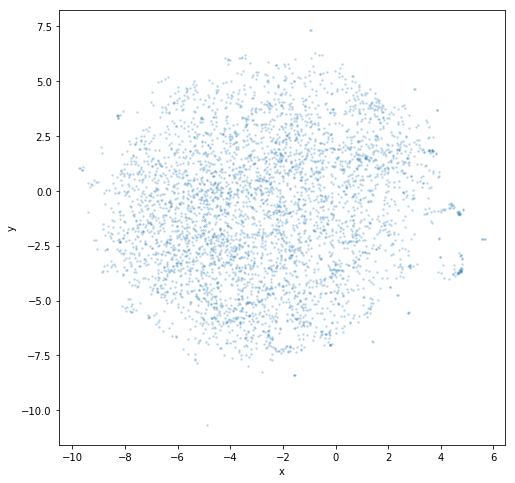

In [40]:
_ = coords_df.plot.scatter('x', 'y', figsize=(8,8), marker='.', s=10, alpha=0.2)

In [41]:
output_notebook()

Loading BokehJS ...

In [44]:
subset_df = coords_df.sample(n=1000)
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)
show(p)

In [43]:
output_file('vector_space')